# 用条形图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/问卷调查结果2.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath, index_col='功能')

# 定义画图用的数据
category_names = df.index
labels = df.columns
data = df.values

### 3. 开始画图

用「**面向对象**」的方法画图。

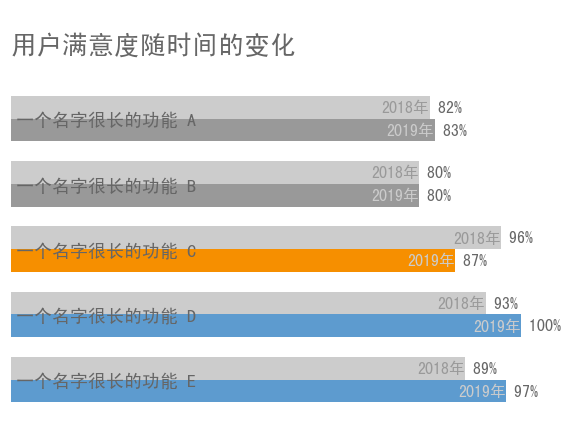

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax=plt.subplots(figsize=(8, 6))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 设置标题
ax.text(0, -1, '\n用户满意度随时间的变化', fontsize=26, ha='left', color=c['深灰色'])

# 设置 X 轴的取值范围
ax.set_xlim(0, 1)

# 倒转 Y 轴，让第一个功能排在最上面
ax.invert_yaxis()

# 定义颜色
category_colors = [c['灰色'], c['灰色'], c['橙色'], c['浅蓝色'], c['浅蓝色']]

# 定义条形图所处的位置和高度
x = np.arange(len(category_names))
height = 0.35

# 画条形图
bar1 = ax.barh(x-height/2, data[:, 0], height, label=labels[0], color=c['浅灰色'])
bar2 = ax.barh(x+height/2, data[:, 1], height, label=labels[1], color=category_colors)

# 设置 Y 轴标签字体大小和颜色
plt.yticks(range(len(category_names)), ' ' + category_names, ha='left', color=c['深灰色'], size=18)

# 设置标签的字体大小
fontsize = 16

# 设置第一个条形图的数据标签
for (i, rect) in zip(range(len(bar1)), bar1):
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, labels[0], ha='right', va='center', color=c['灰色'], fontsize=fontsize)
    ax.text(w, rect.get_y()+rect.get_height()/2, ' %.0f%%' % (w*100), ha='left', va='center', color=c['深灰色'], fontsize=fontsize)
    
# 设置第二个条形图的数据标签
for rect in bar2:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, labels[1], ha='right', va='center', color=c['浅灰色'], fontsize=fontsize)
    ax.text(w, rect.get_y()+rect.get_height()/2, ' %.0f%%' % (w*100), ha='left', va='center', color=c['深灰色'], fontsize=fontsize)
    
# 隐藏 X 轴
ax.xaxis.set_visible(False)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 隐藏 Y 轴的刻度线
ax.tick_params(axis='y', which='major', length=0)

plt.show()